Varianza explicada por cada componente:
 [0.79015617 0.19914744 0.00542616 0.00383797 0.00143226]


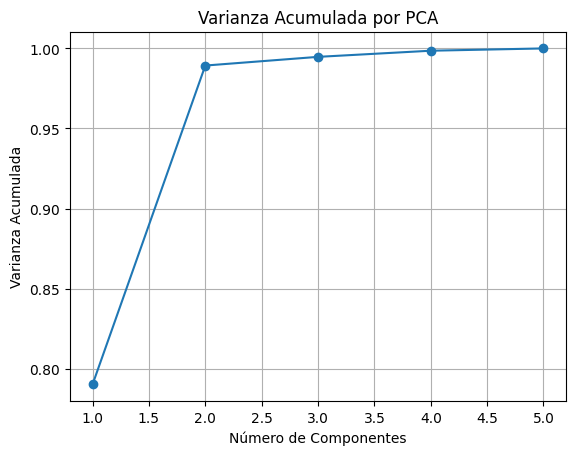

Datos transformados con 2 componentes.
Varianza acumulada con los componentes seleccionados: 0.9893036127731256
Matriz de Componentes Principales:
          ID      Edad  Ingresos  Gasto_Mensual  Calificación_Crédito
0 -0.045857  0.499871  0.500765       0.499060              0.498197
1  0.997941  0.041018  0.017996       0.044364             -0.011828


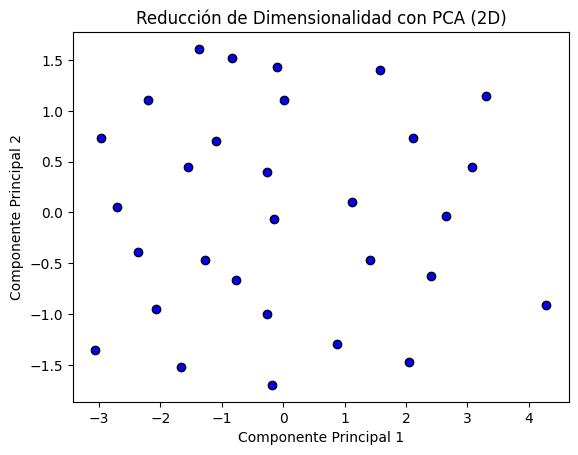

No es posible crear un gráfico 3D, solo se calcularon 2 componentes.

Interpretación:
- Los componentes principales seleccionados explican la mayor parte de la varianza del conjunto de datos.
- La reducción de dimensionalidad nos permite simplificar los datos sin perder información importante.
- En los gráficos podemos identificar patrones y relaciones entre las observaciones.
- Esta técnica podría ser útil para tareas como segmentación o reducción de ruido en análisis de datos.


In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

# 1. Cargar los datos desde el archivo CSV
data = pd.read_csv('../data/conjuto_datos.csv')

# 2. Verificamos si hay valores faltantes.
# Esto es importante porque PCA no funciona bien con datos incompletos.
data.isnull().sum()

# 3. Llenamos los valores faltantes con la media de cada columna.
# Esto es una solución simple pero efectiva para no perder información.
data = data.fillna(data.mean())

# 4. Verificamos si hay variables categóricas y las codificamos (si es necesario).
# Algunas columnas podrían ser texto, por lo que usamos get_dummies para convertirlas en números.
data = pd.get_dummies(data)

# 5. Normalizamos los datos para que todas las variables estén en la misma escala.
# Esto es importante para evitar que algunas variables dominen el análisis.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 6. Aplicamos PCA para explorar cuánta varianza explican los componentes principales.
# Aquí no limitamos el número de componentes aún, solo queremos ver los resultados.
pca = PCA()
pca.fit(data_scaled)
varianza_explicada = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:\n", varianza_explicada)

# 7. Graficamos la varianza acumulada para ver cuántos componentes necesitamos.
# Esto nos ayuda a decidir cuántos componentes usar sin perder mucha información.
varianza_acumulada = np.cumsum(varianza_explicada)
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por PCA')
plt.grid(True)
plt.show()

# 8. Seleccionamos los componentes que explican al menos el 95% de la varianza.
# Esta es una práctica común para reducir dimensionalidad sin perder demasiada información.
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled)

print(f"Datos transformados con {data_pca.shape[1]} componentes.")
print("Varianza acumulada con los componentes seleccionados:", np.sum(pca.explained_variance_ratio_))

# 9. Mostramos la matriz de componentes principales para ver cómo se relacionan con las variables originales.
# Esto nos da una idea de qué características están más asociadas con cada componente.
componentes_df = pd.DataFrame(pca.components_, columns=data.columns)
print("Matriz de Componentes Principales:\n", componentes_df)

# 10. Visualizamos los datos transformados en 2D usando las dos primeras componentes.
# Esto nos permite ver si hay algún patrón interesante en los datos reducidos.
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue', edgecolors='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Reducción de Dimensionalidad con PCA (2D)')
plt.show()

# 11. Si tenemos al menos 3 componentes, creamos una visualización en 3D.
# Esto es útil si queremos ver la distribución en otro nivel de detalle.
if data_pca.shape[1] >= 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c='red', edgecolor='k')
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.set_zlabel('Componente 3')
    plt.title('Visualización en 3D de PCA')
    plt.show()
else:
    print(f"No es posible crear un gráfico 3D, solo se calcularon {data_pca.shape[1]} componentes.")

# 12. Reflexión sobre los resultados
# Aquí podríamos decir:
print("\nInterpretación:")
print("- Los componentes principales seleccionados explican la mayor parte de la varianza del conjunto de datos.")
print("- La reducción de dimensionalidad nos permite simplificar los datos sin perder información importante.")
print("- En los gráficos podemos identificar patrones y relaciones entre las observaciones.")
print("- Esta técnica podría ser útil para tareas como segmentación o reducción de ruido en análisis de datos.")
